In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
mush = pd.read_csv('C:/Users/9/Downloads/training_mush.csv')

In [3]:
mush.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
5,3,3,4,0,2,1,0,1,0,1,...,6,6,0,2,1,0,7,4,4,1
6,0,3,8,1,5,1,0,0,8,0,...,7,7,0,2,2,4,5,4,3,1
7,3,3,2,0,8,1,0,1,0,1,...,7,6,0,2,1,0,7,4,4,1
8,5,2,8,0,5,1,1,0,7,1,...,7,7,0,2,1,0,2,3,1,0
9,5,0,3,0,1,1,0,1,2,0,...,7,7,0,2,1,4,3,4,0,1


In [4]:
mush.shape

(6093, 23)

In [5]:
mush = mush.rename(columns={'class': 'class_mush'})

In [6]:
mush.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_mush
count,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,...,6093.000000,6093.000000,6093.0,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000
mean,3.357624,1.836862,4.500246,0.416051,4.171672,0.975546,0.161169,0.308551,4.806992,0.568849,...,5.809125,5.790415,0.0,1.968160,1.068767,2.276711,3.589201,3.639422,1.497292,0.482521
std,1.608300,1.231684,2.547747,0.492943,2.114982,0.154467,0.367717,0.461933,3.551632,0.495278,...,1.907454,1.917425,0.0,0.231266,0.271237,1.802159,2.381904,1.265664,1.716782,0.499735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [7]:
mush.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class_mush                  0
dtype: int64

In [8]:
X_train = mush.drop(['class_mush'], axis=1)

In [9]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
6089,3,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6090,5,2,3,0,1,1,0,1,9,0,...,2,7,7,0,2,1,4,3,4,0
6091,3,2,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [10]:
y_train = mush.class_mush

In [11]:
y_train

0       0
1       1
2       1
3       0
4       0
       ..
6088    0
6089    1
6090    1
6091    0
6092    1
Name: class_mush, Length: 6093, dtype: int64

In [12]:
clf = RandomForestClassifier(random_state=0)

In [13]:
parametrs = {'n_estimators': [10, 20, 30, 40, 50], 
             'max_depth': [1, 3, 5, 7, 9, 11, 13],
             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
             'min_samples_split': [2, 4, 6, 8, 10]}

In [14]:
best_clf=GridSearchCV(clf, parametrs, cv=3, n_jobs=-1, verbose=1)

In [15]:
best_clf.fit(X_train, y_train)

Fitting 3 folds for each of 1225 candidates, totalling 3675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3675 out of 3675 | elapsed:  3.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=1)

In [16]:
best_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [17]:
new_clf = RandomForestClassifier(random_state=0, n_estimators = 10, max_depth = 9, min_samples_leaf = 1, min_samples_split = 2)

In [18]:
new_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [19]:
new_clf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [20]:
fi = new_clf.feature_importances_

In [21]:
fi_df = pd.DataFrame({'features': list(X_train),
                     'feature_importances': fi})

In [22]:
fi_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [23]:
mush_test = pd.read_csv('C:/Users/9/Downloads/testing_mush.csv')

In [24]:
mush_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [25]:
y_pred = new_clf.predict(mush_test)

In [26]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [27]:
y_pred_df = pd.DataFrame({'y_pred': y_pred})

In [28]:
y_pred_df.head(10)

,y_pred
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [29]:
y_pred_df.describe()

,y_pred
count,2031.000000
mean,0.480551
std,0.499745
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [30]:
2031*0.480551

975.999081

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_true=pd.read_csv('C:/Users/9/Downloads/testing_y_mush.csv/testing_y_mush.csv')

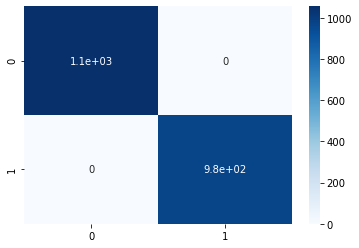

In [33]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")